**What is Churn?**

*Churn rate is a measure of the proportion of individuals or items moving out of a group over a specific period. It is one of two primary factors that determine the steady-state level of customers a business will support.*

## IMPORT NECESSARY LIBRARIES

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import pymysql
%matplotlib inline

## DATA PRE-PROCESSING

## IMPORT DATASETS

In [5]:
dataset1 = pd.read_csv('TelcomCustomer-Churn_1.csv')
dataset2 = pd.read_csv('TelcomCustomer-Churn_2.csv')

In [6]:
dataset1.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No


In [7]:
dataset2.head(5)

,customerID,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## MERGE 2 DATASETS

In [8]:
Final_Data = dataset1.merge(dataset2, how='inner')

In [9]:
Final_Data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
Final_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


The Datasets are merged and now we can import the dataset into the **SQL database** and access it

In [11]:
Final_Data.to_csv('ChurnData.csv')

## Connect to the SQL server

In [12]:
db_name = 'Churn'
db_host = 'localhost'
db_username = 'root'
db_password = 'Allah@123'

In [13]:
try: 
    conn = pymysql.connect(host = db_host,
                          port = int(3306),
                          user = db_username,
                          passwd = db_password,
                          db = db_name)
except e:
    print(e)
if conn:
    print('Successfull connection')
else:
    print('Error')

Successfull connection


## Access Database

In [14]:
Final_Data = pd.read_sql_query('SELECT * FROM Churndata',conn)

C:\Users\hasun\AppData\Local\Temp\ipykernel_16304\1327850487.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  Final_Data = pd.read_sql_query('SELECT * FROM Churndata',conn)


In [15]:
Final_Data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [16]:
Final_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [17]:
Final_Data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

There are no missing values and NaN values, we can continue now

In [55]:
Final_Data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [57]:
Final_Data['tenure'].max()

72

The tenure is in months and if we plot it against churn the x-axis will have **72** outcomes, in order to correct this  we can **group the tenure**

In [62]:
labels = ["{0} - {1}".format(i, i+11) for i in range(1, 72, 12)]
Final_Data['Tenure_group'] = pd.cut(Final_Data.tenure, range(1,80,12), right = False, labels = labels)

In [63]:
Final_Data['Tenure_group'].value_counts()

1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: Tenure_group, dtype: int64

## Now we can remove the columns that may not impact the target variable

In [68]:
Final_Data.drop(columns= ['customerID','tenure'], axis=1, inplace=True)
Final_Data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


## DATA EXPLORATION

***Univariate Analysis***

C:\Users\hasun\AppData\Local\Temp\ipykernel_2676\3369586982.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(i)


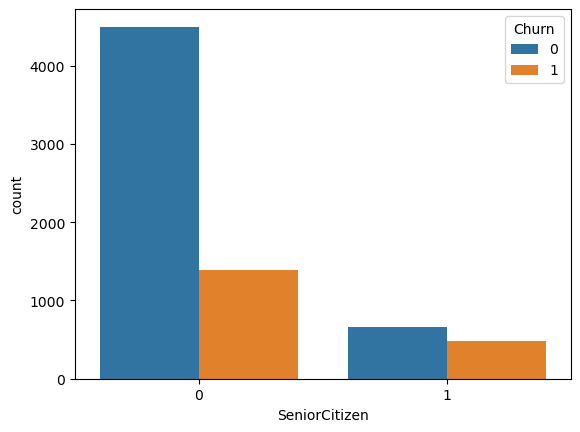

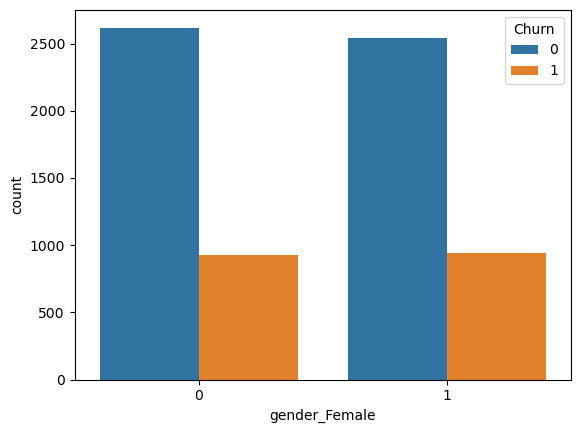

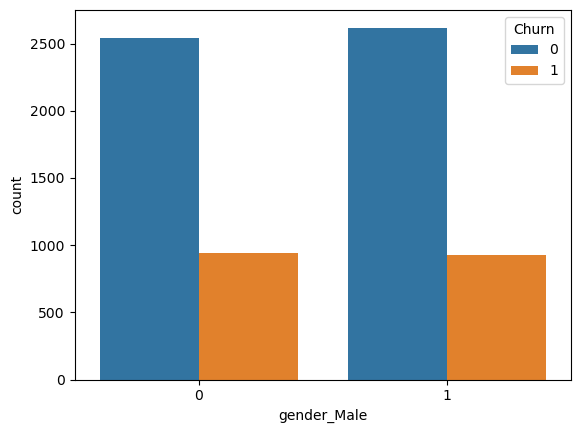

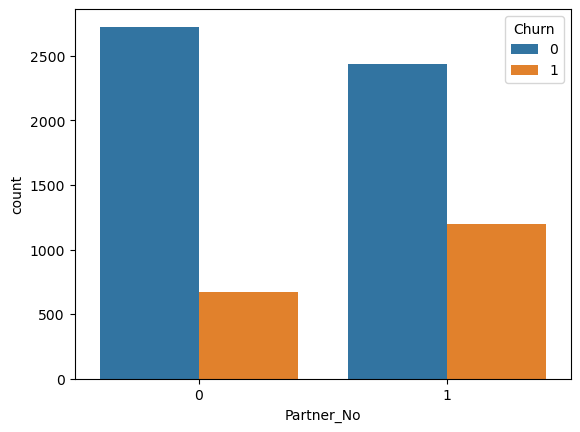

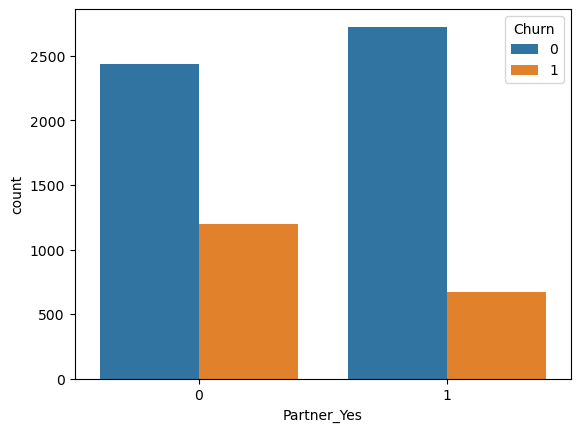

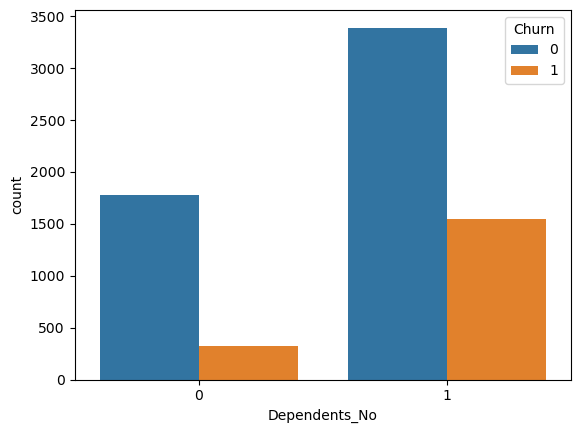

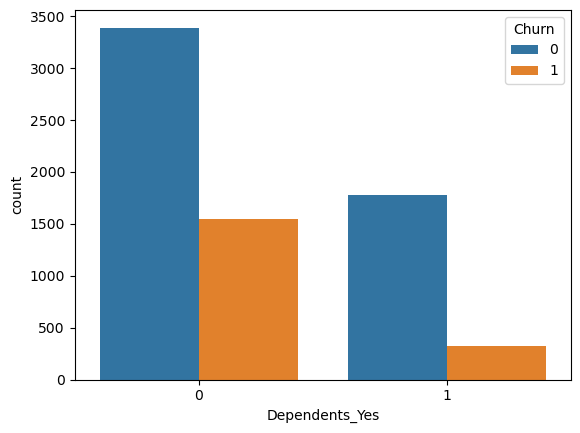

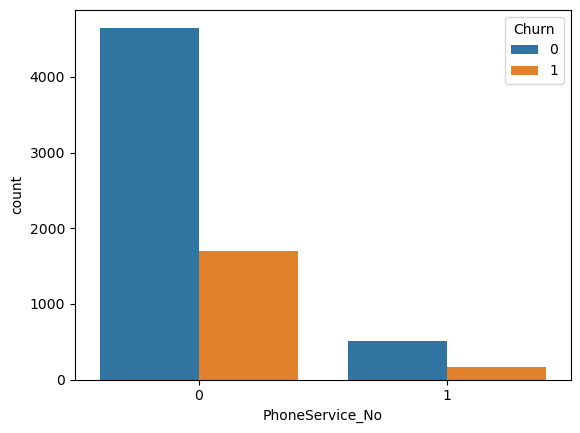

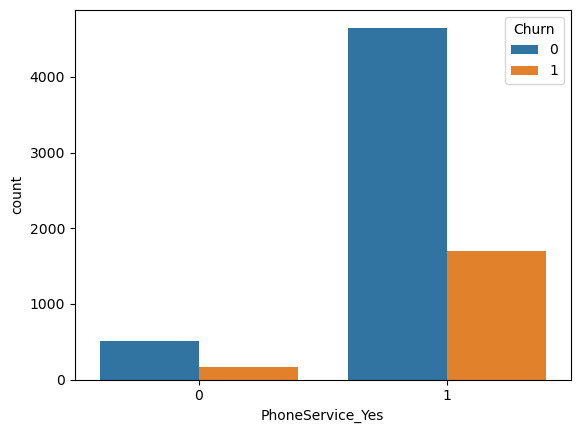

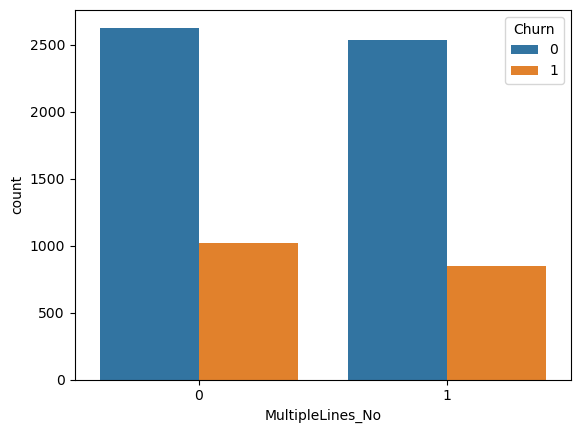

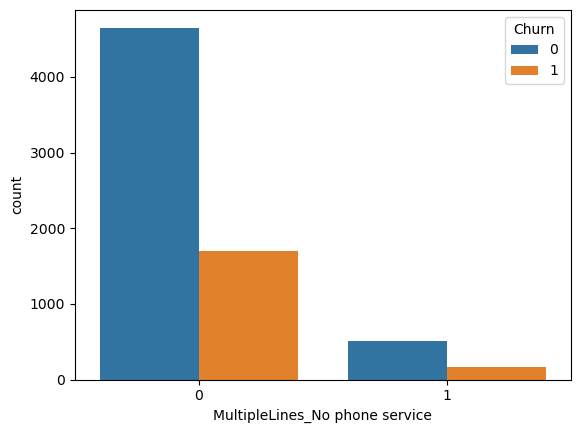

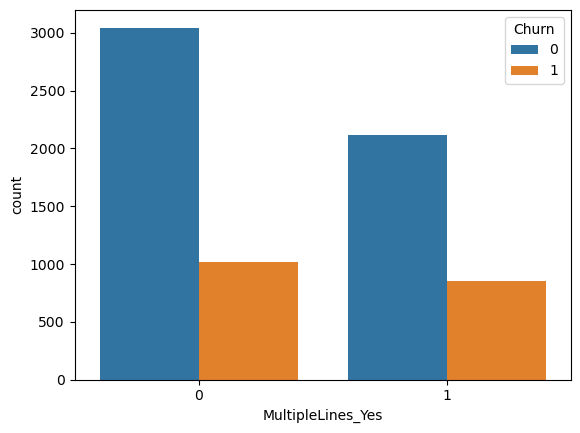

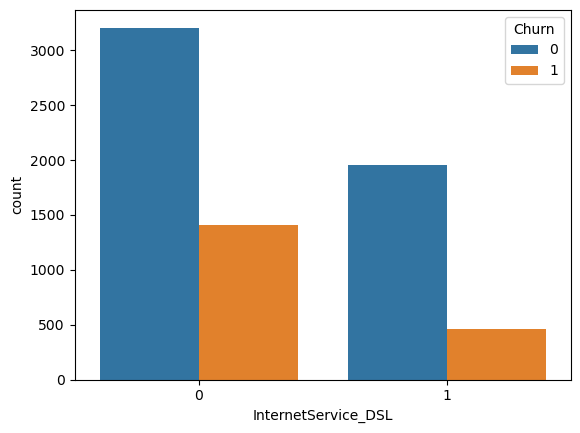

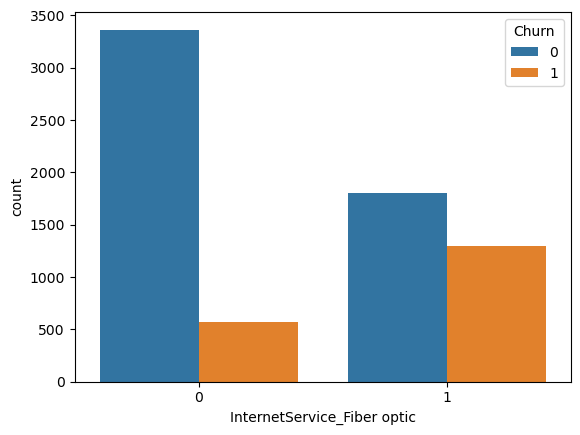

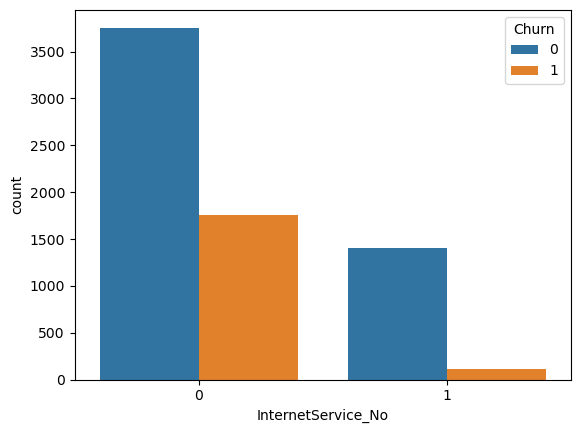

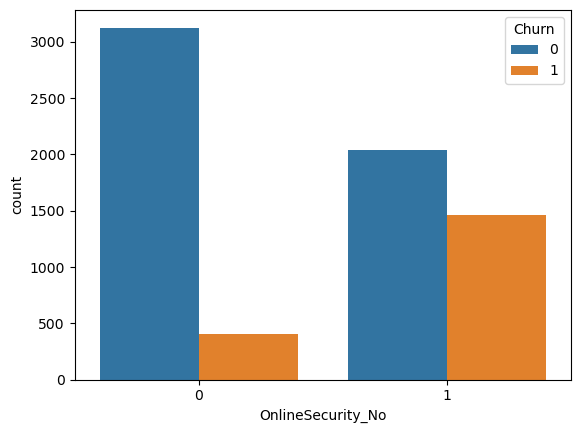

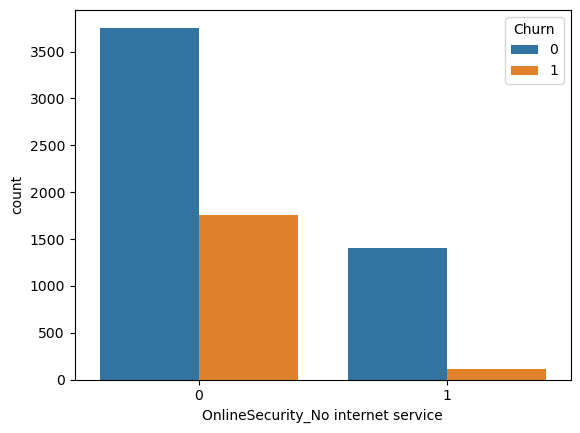

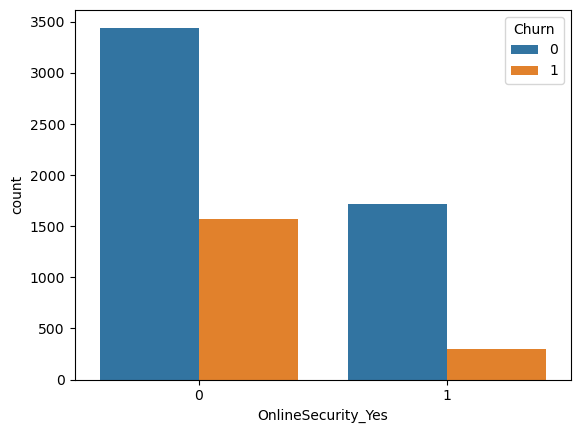

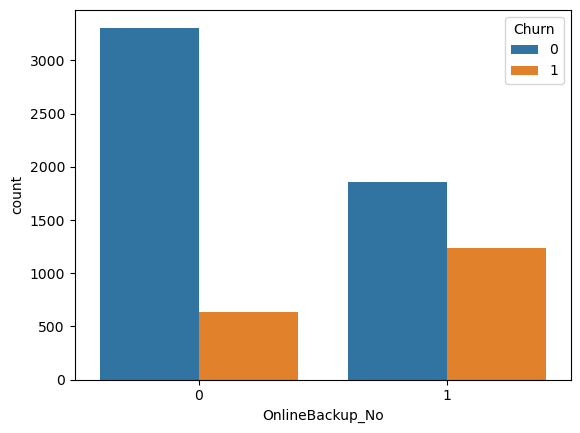

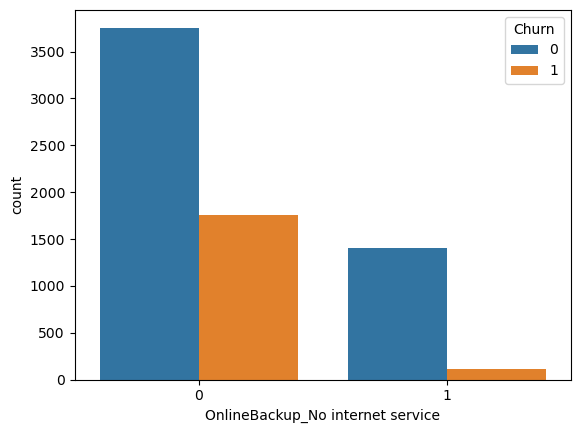

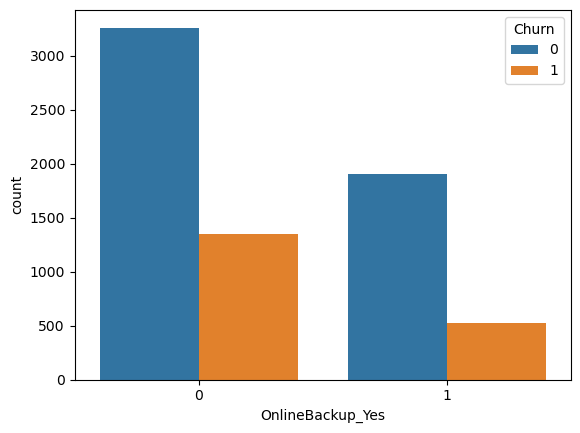

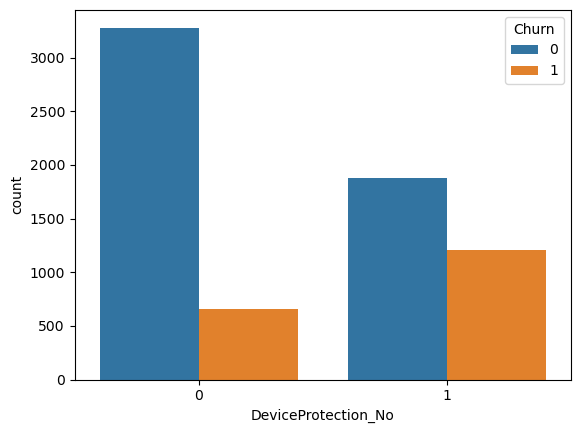

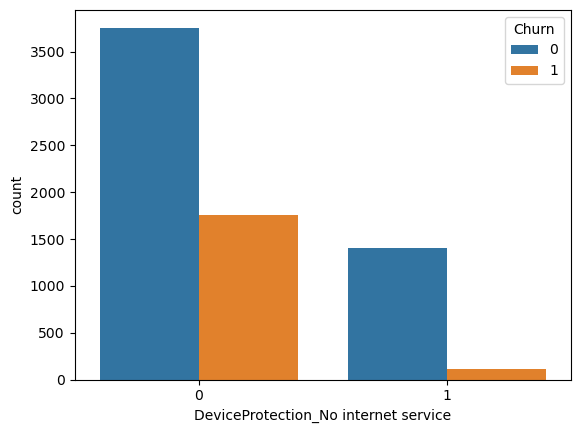

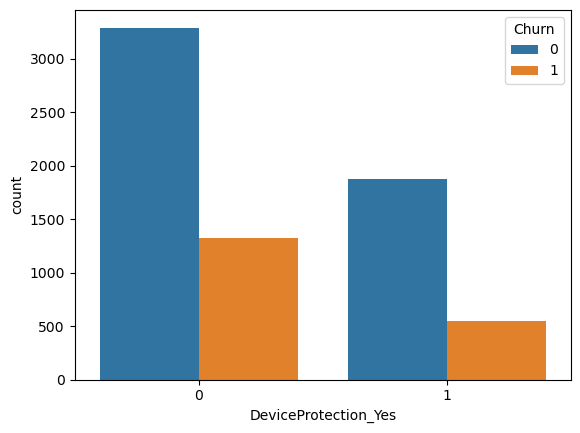

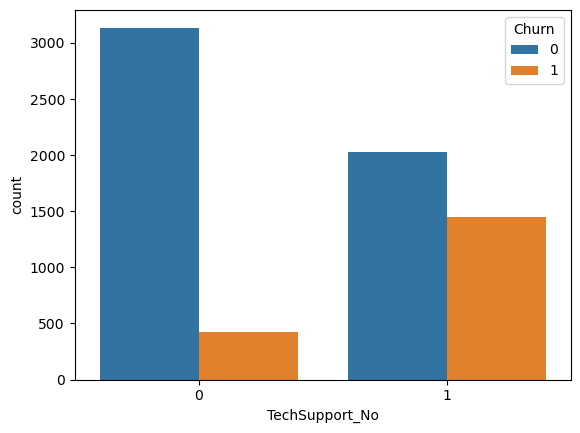

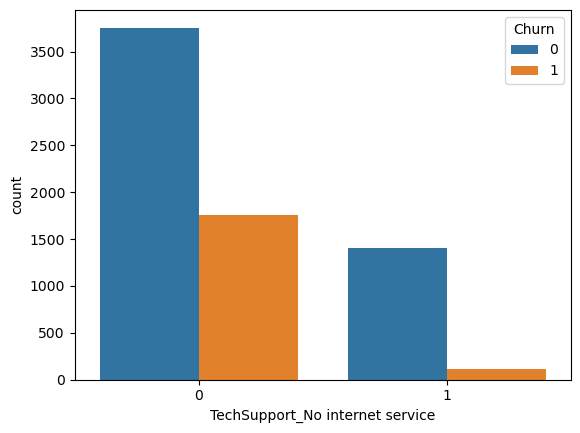

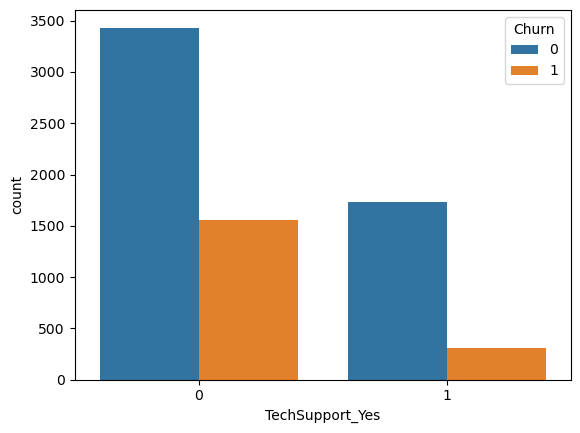

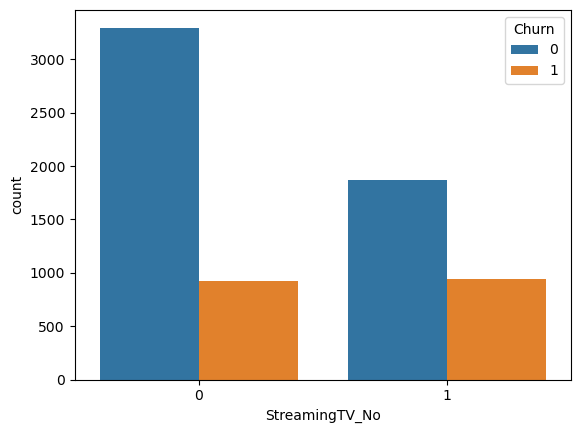

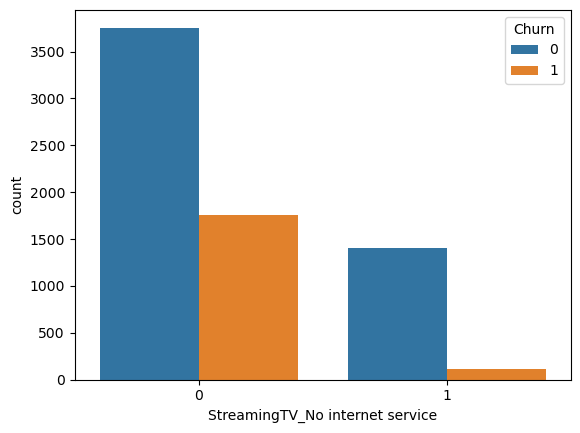

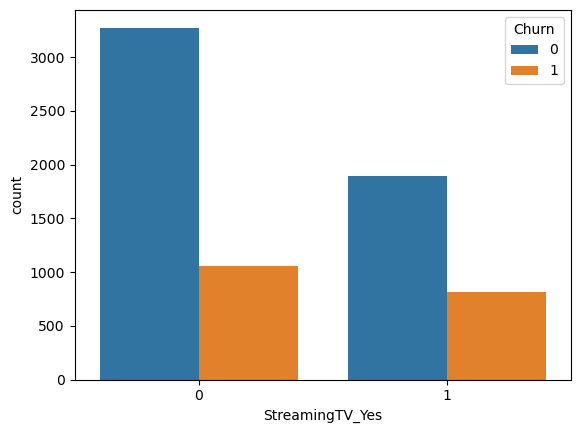

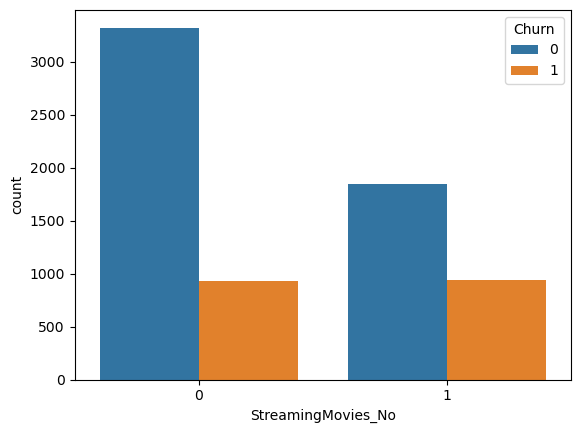

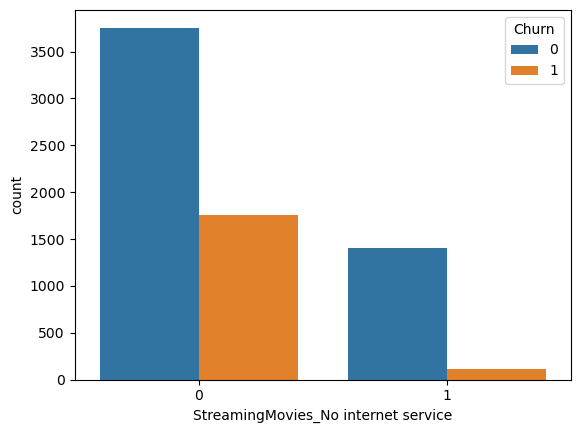

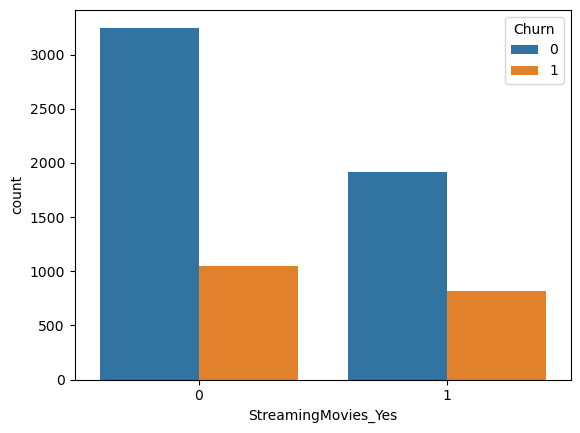

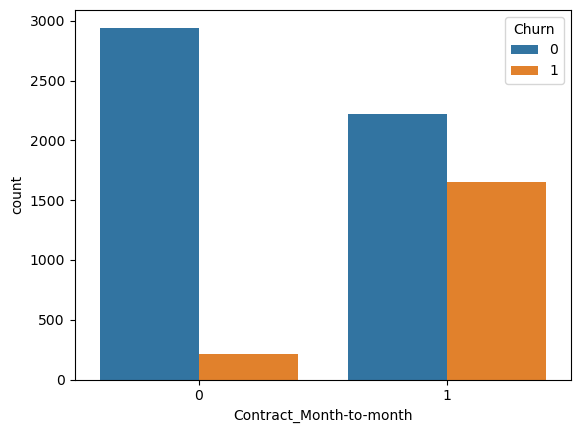

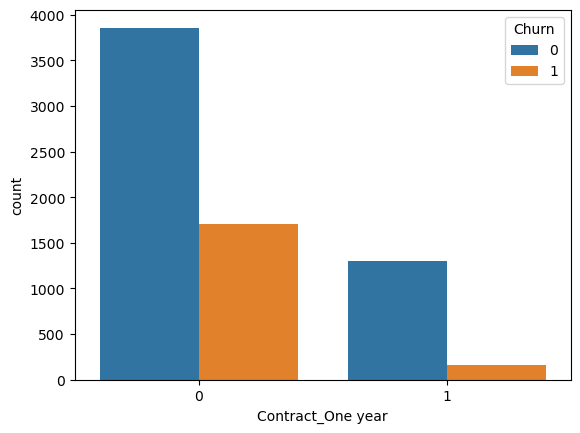

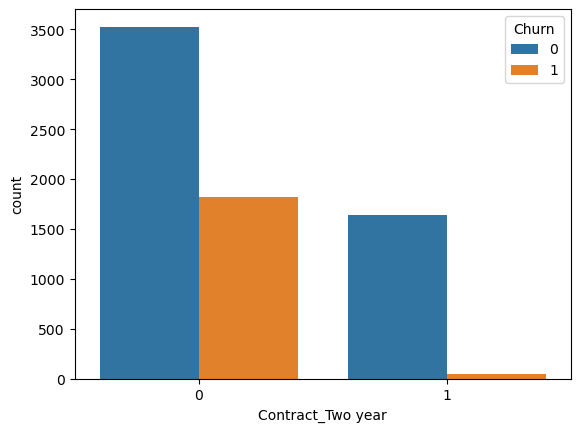

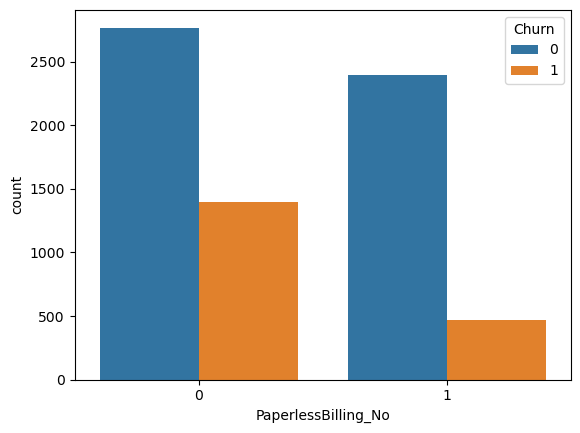

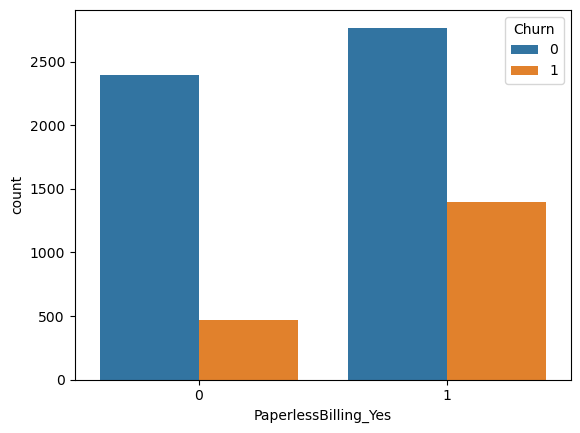

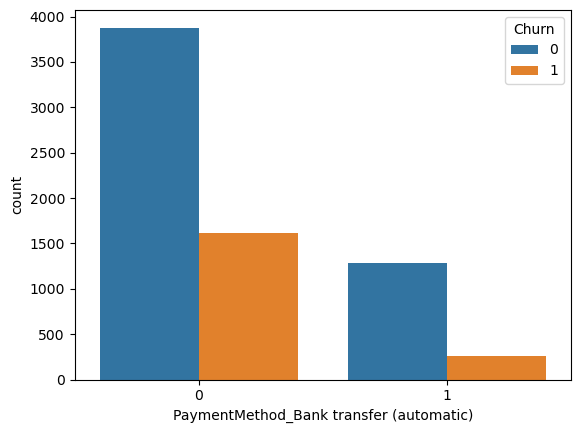

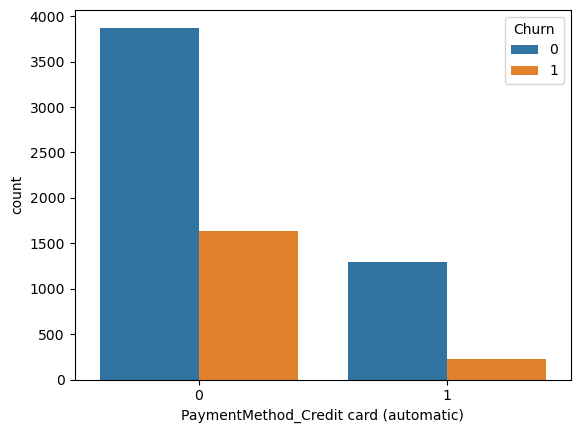

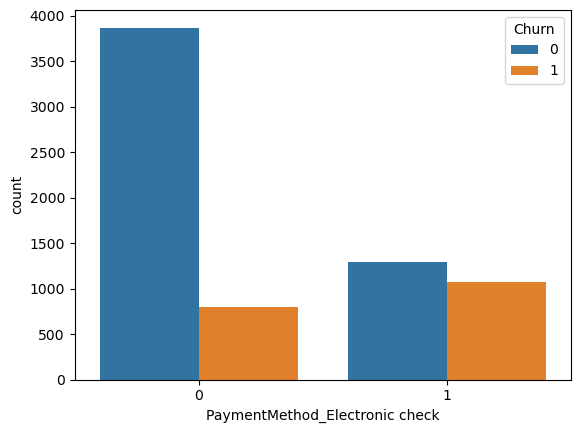

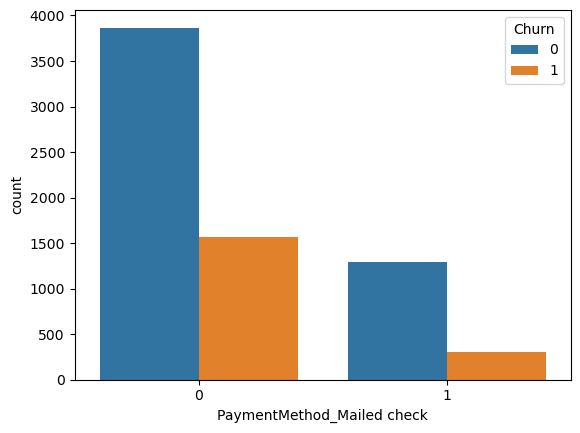

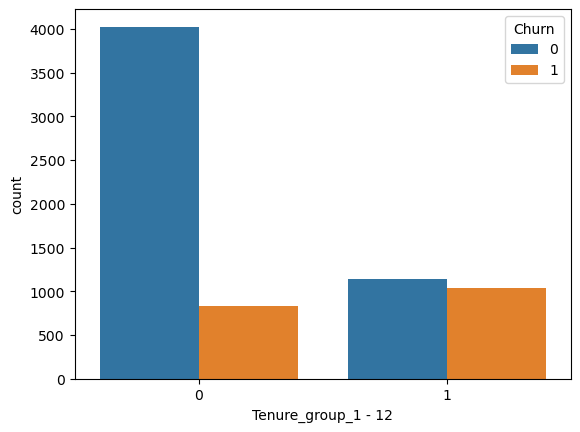

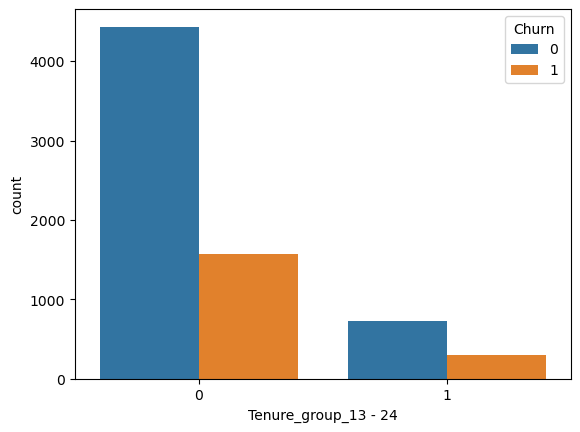

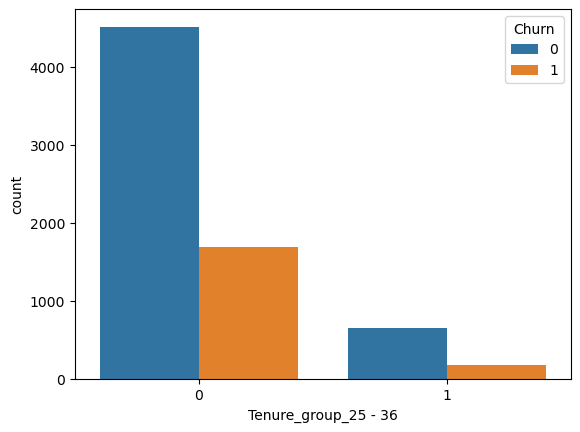

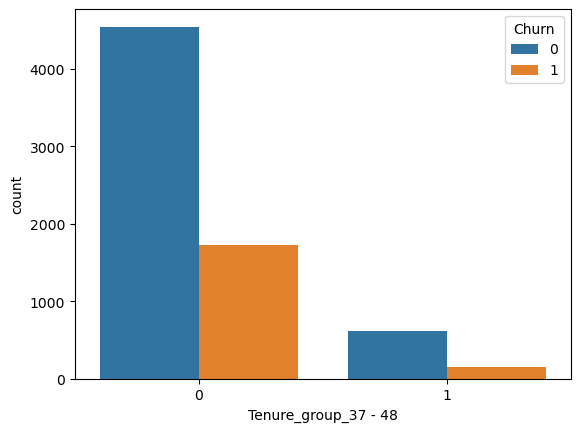

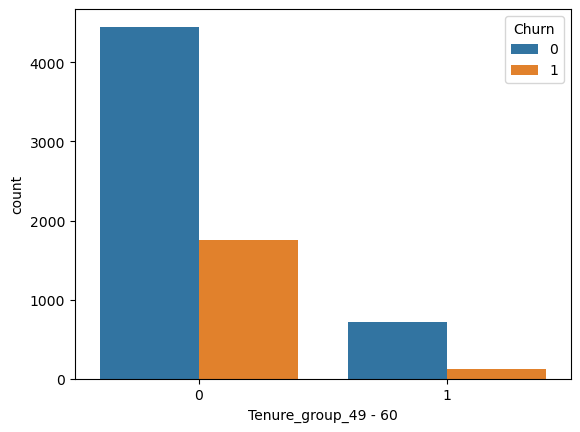

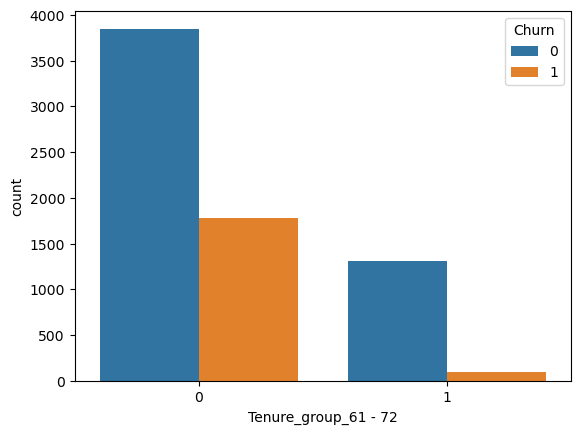

In [153]:
for i, predictor in enumerate(Final_Data.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=Final_Data, x=predictor, hue='Churn')

## The Above plots are the individual predictors of the churn

***Convert the target variable 'Churn' into a binary variable, Yes = 1, No = 0***

In [104]:
Final_Data['Churn'] = np.where(Final_Data.Churn == 'Yes', 1, 0)

In [105]:
Final_Data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


 IN ORDER TO ANALYSE CONVERT THE DATA TO DUMMIES & AS **CATEGORICAL VALUES (0s AND 1s)**

In [106]:
Final_Data_dummies = pd.get_dummies(Final_Data)
Final_Data_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,customerID_0002-ORFBO,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


**Relation between Monthly and TotalCharges**

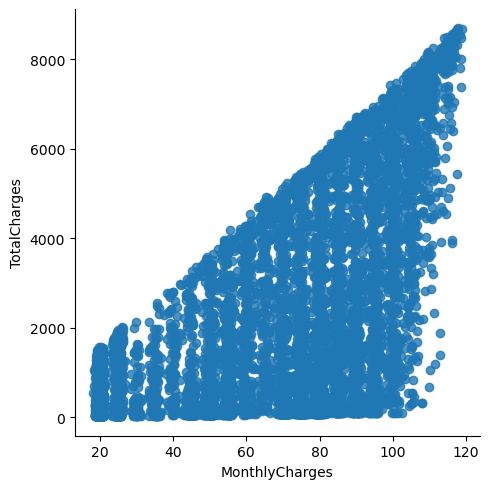

In [95]:
sns.lmplot(data = Final_Data_dummies, x='MonthlyCharges', y='TotalCharges', fit_reg=False)

As expected the **total charges increase as the monthly increases**

 To get insights we need to get the correlation between Churn and affecting parameters

<Axes: >

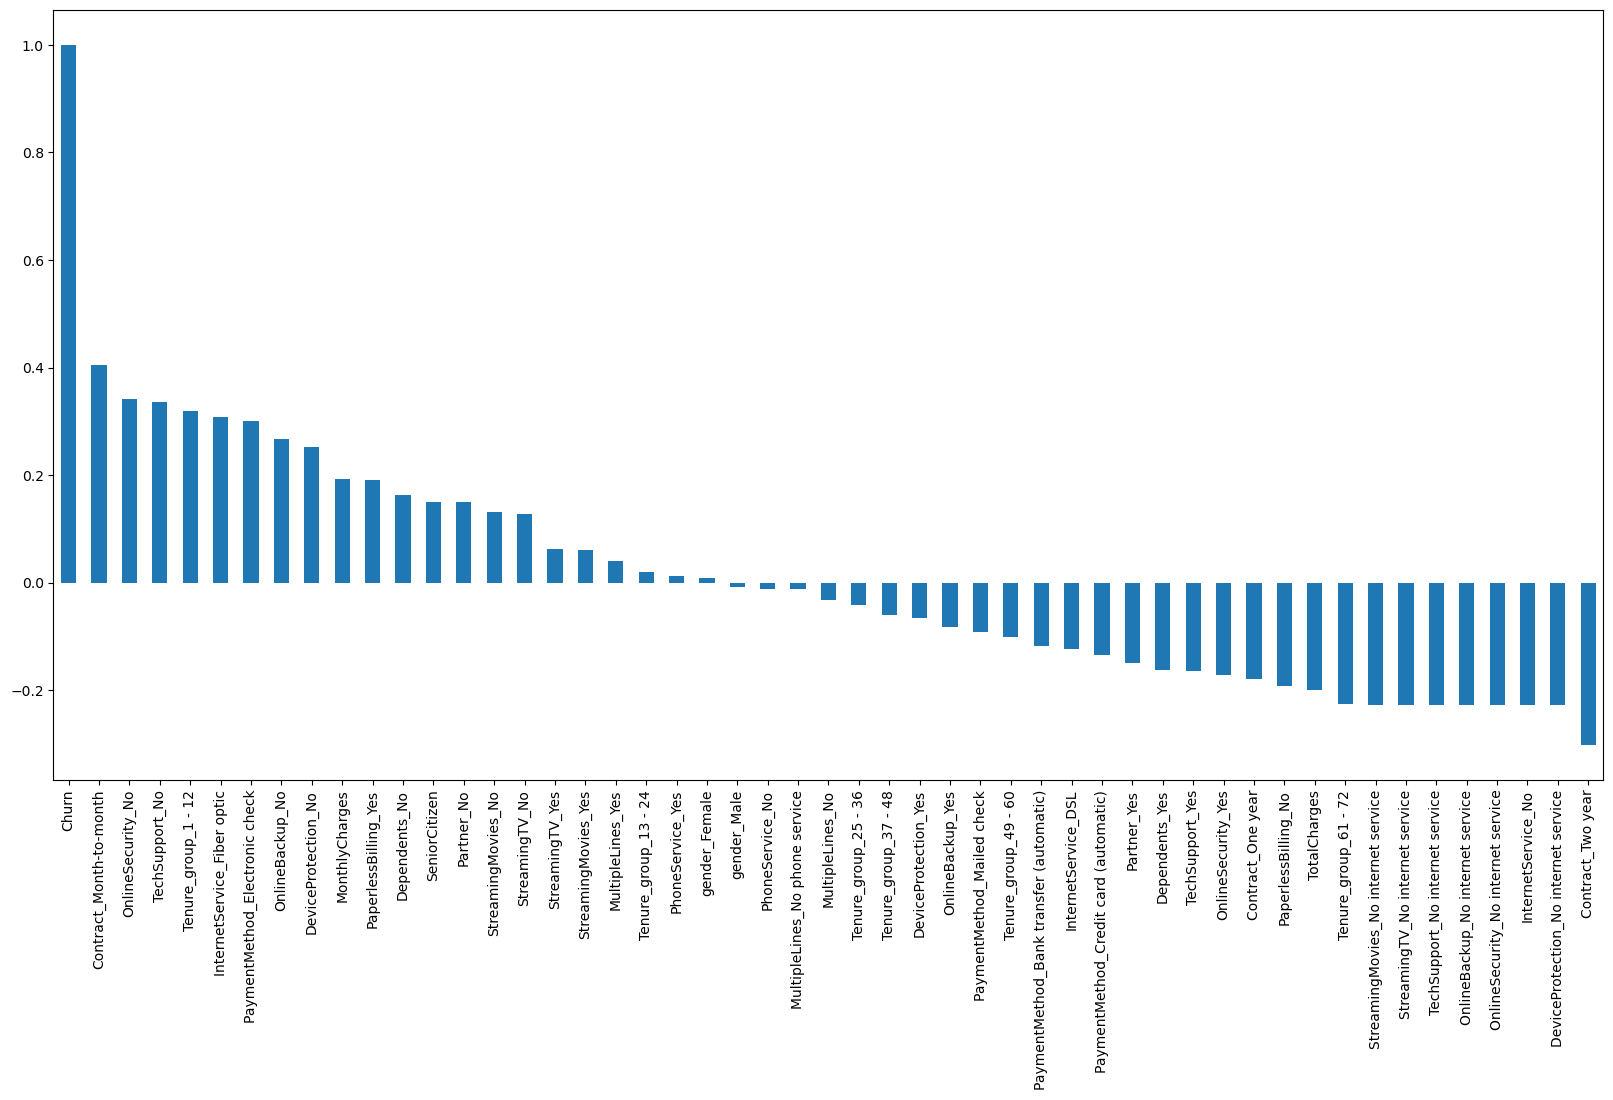

In [112]:
plt.figure(figsize=(20,10))
Final_Data_dummies.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')

From the above graph we can see,
- **Gender either Male or Female, Availability of Phone service** has very less impact on the Churn and also, we have,
- Maximum Churn is seen in case of **Month to Month contracts, NO Online Security, NO Tech_Support and in Tenure Group 1-12**. 
- Minimum Churn is seen in case of **2 Year Contract, No Interner Service, Subscriptions with no internet service**.

# Churn By monthly charges

Text(0.5, 1.0, 'Monthly charges by churn')

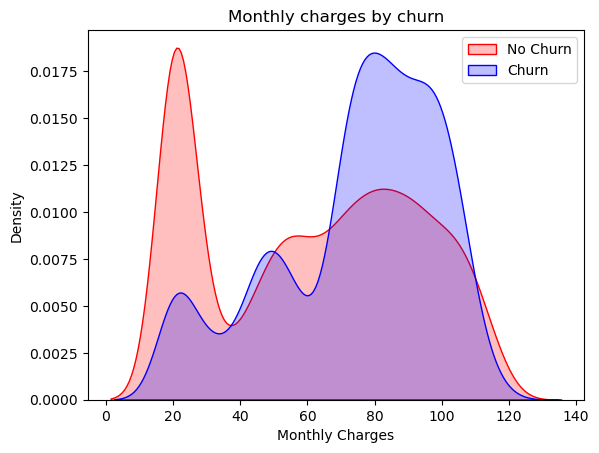

In [125]:
Churn_Monthly = sns.kdeplot(Final_Data_dummies.MonthlyCharges[Final_Data_dummies['Churn'] == 0],
                           color="Red", fill = True)
Churn_Monthly = sns.kdeplot(Final_Data_dummies.MonthlyCharges[Final_Data_dummies['Churn'] == 1],
                           ax = Churn_Monthly, color="Blue", fill= True)
Churn_Monthly.legend(["No Churn", "Churn"],loc='upper right')
Churn_Monthly.set_ylabel('Density')
Churn_Monthly.set_xlabel('Monthly Charges')
Churn_Monthly.set_title('Monthly charges by churn')

For TotalCharges modify the code where 'MonthlyCharges' are replaced by 'TotalCharges'

Churn is drastically increased where the monthly charges are high --> Infered from above graph

Text(0.5, 1.0, 'Total charges by churn')

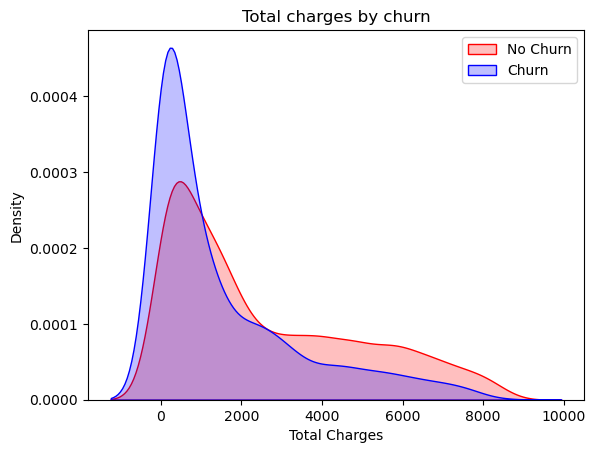

In [127]:
Churn_total = sns.kdeplot(Final_Data_dummies.TotalCharges[Final_Data_dummies['Churn'] == 0],
                           color="Red", fill = True)
Churn_total = sns.kdeplot(Final_Data_dummies.TotalCharges[Final_Data_dummies['Churn'] == 1],
                           ax = Churn_total, color="Blue", fill= True)
Churn_total.legend(["No Churn", "Churn"],loc='upper right')
Churn_total.set_ylabel('Density')
Churn_total.set_xlabel('Total Charges')
Churn_total.set_title('Total charges by churn')

But here there is higher churn at lower total charges. This is interesting

**Higher Monthly Charges + Lower tenure = Low Total Charges --> All 3 parameters are related to high churn**

## BIVARIATE ANALYSIS

Bivariate Analysis - We can use 2 columns --> Churners - Yes or NO

**We can use a uniplot function to plot some graphs with Churn yes or no, with hue as our specified paramters for quick insights**

In [30]:
def uniplot(df,col,title, hue):
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(Final_Data[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = Final_Data, x= col, order=Final_Data[col].value_counts().index,hue = hue,palette='bright') 
        
    plt.show()
    

 We will seperate churn yes or no as seperate data_frames

In [31]:
df_target_1 = Final_Data.loc[Final_Data['Churn']==0] #Non churners
df_target_2 = Final_Data.loc[Final_Data['Churn']==1] #Churners

**The Churned Data if the user has partner or not**

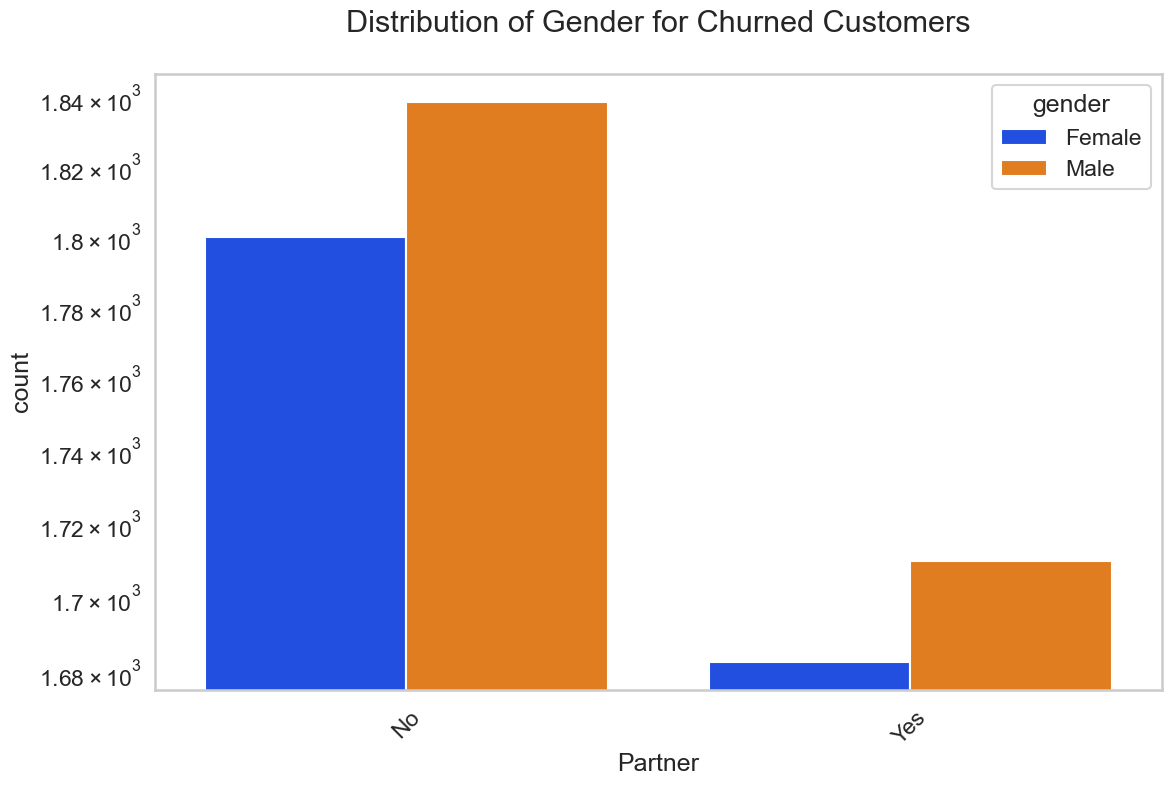

In [32]:
uniplot(df_target_2,col='Partner',title='Distribution of Gender for Churned Customers',hue='gender')

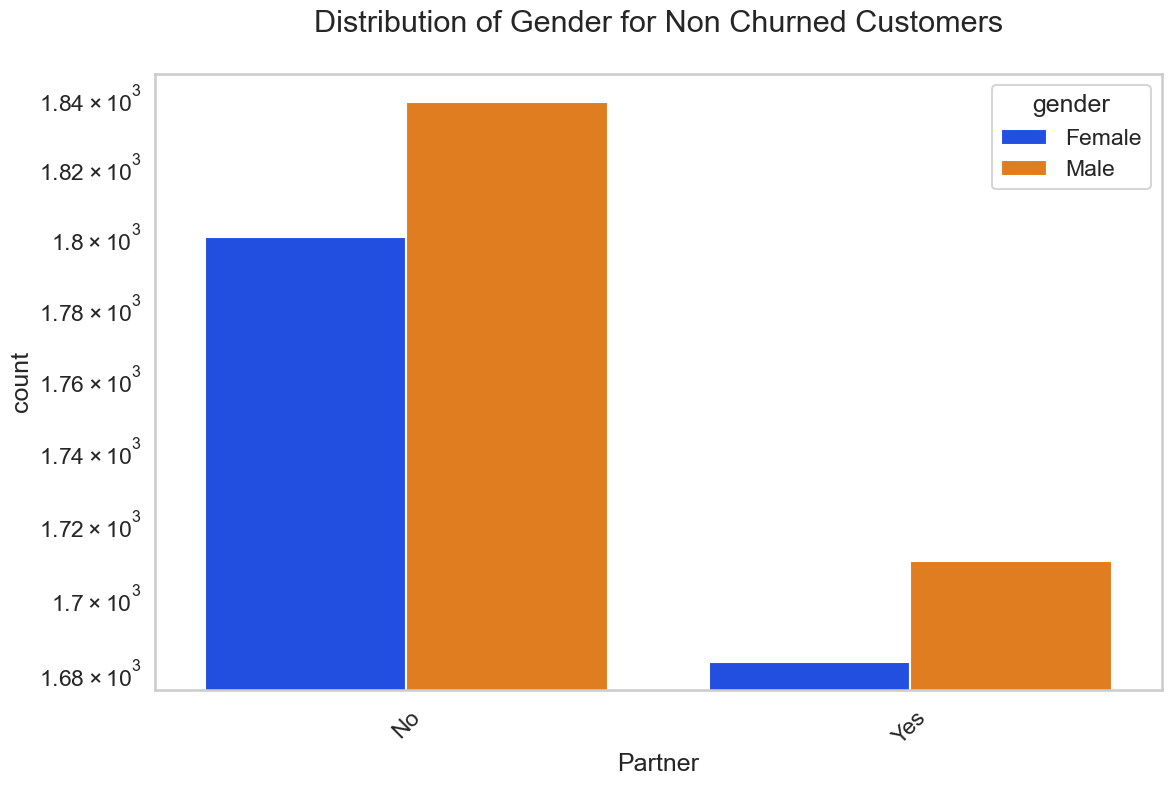

In [33]:
uniplot(df_target_1,col='Partner',title='Distribution of Gender for Non Churned Customers',hue='gender')


**If the user has used different payment method, the churners and non-churners in that specific data_sets are**

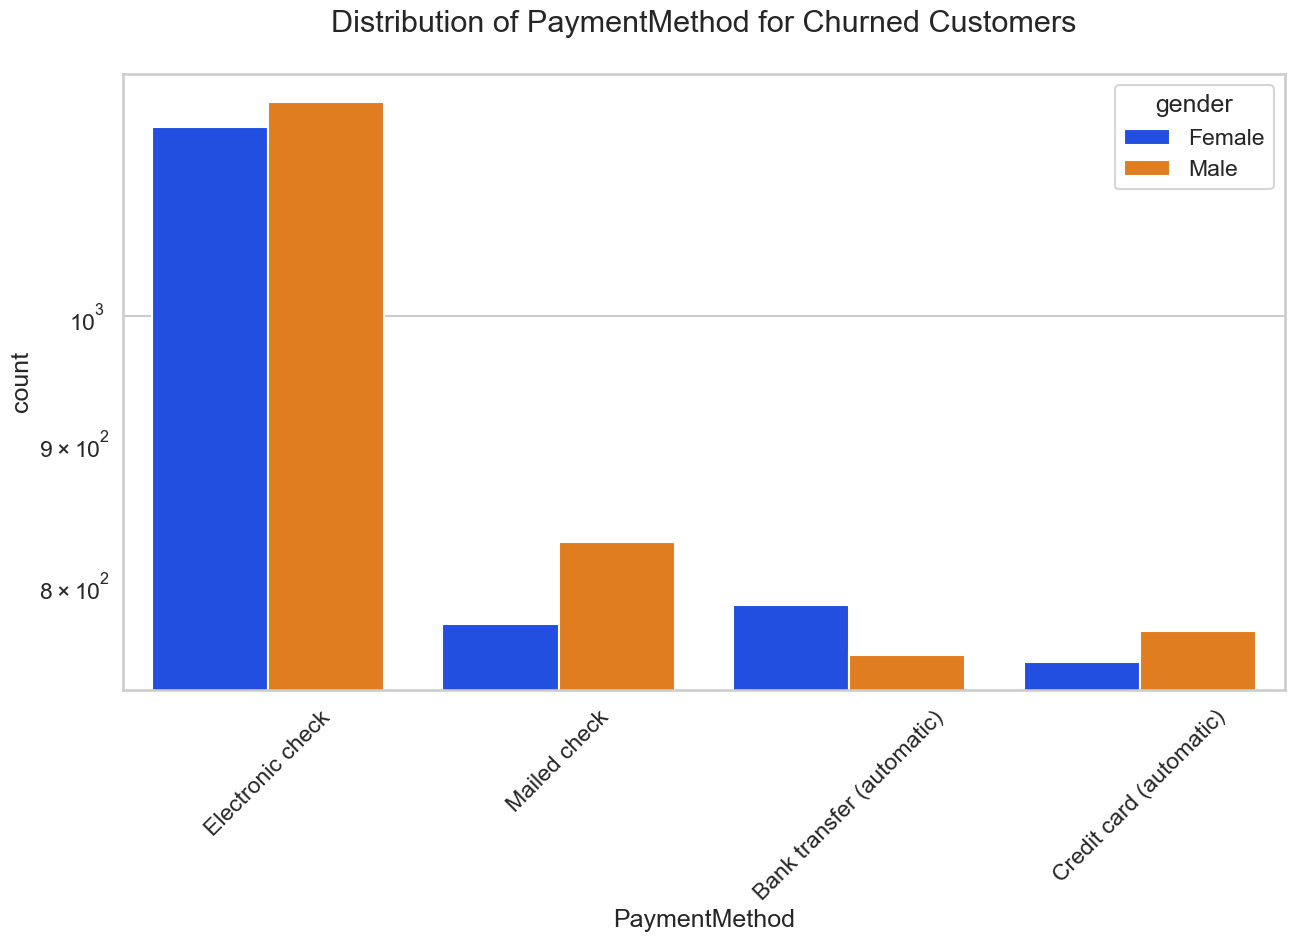

In [43]:
uniplot(df_target_2,col='PaymentMethod',title='Distribution of PaymentMethod for Churned Customers',hue='gender') #Churners


**From this we can infer that the people who use Electronic check are likely to churn in both female and male and the people with credit card payments are likely to not churn in both genders**

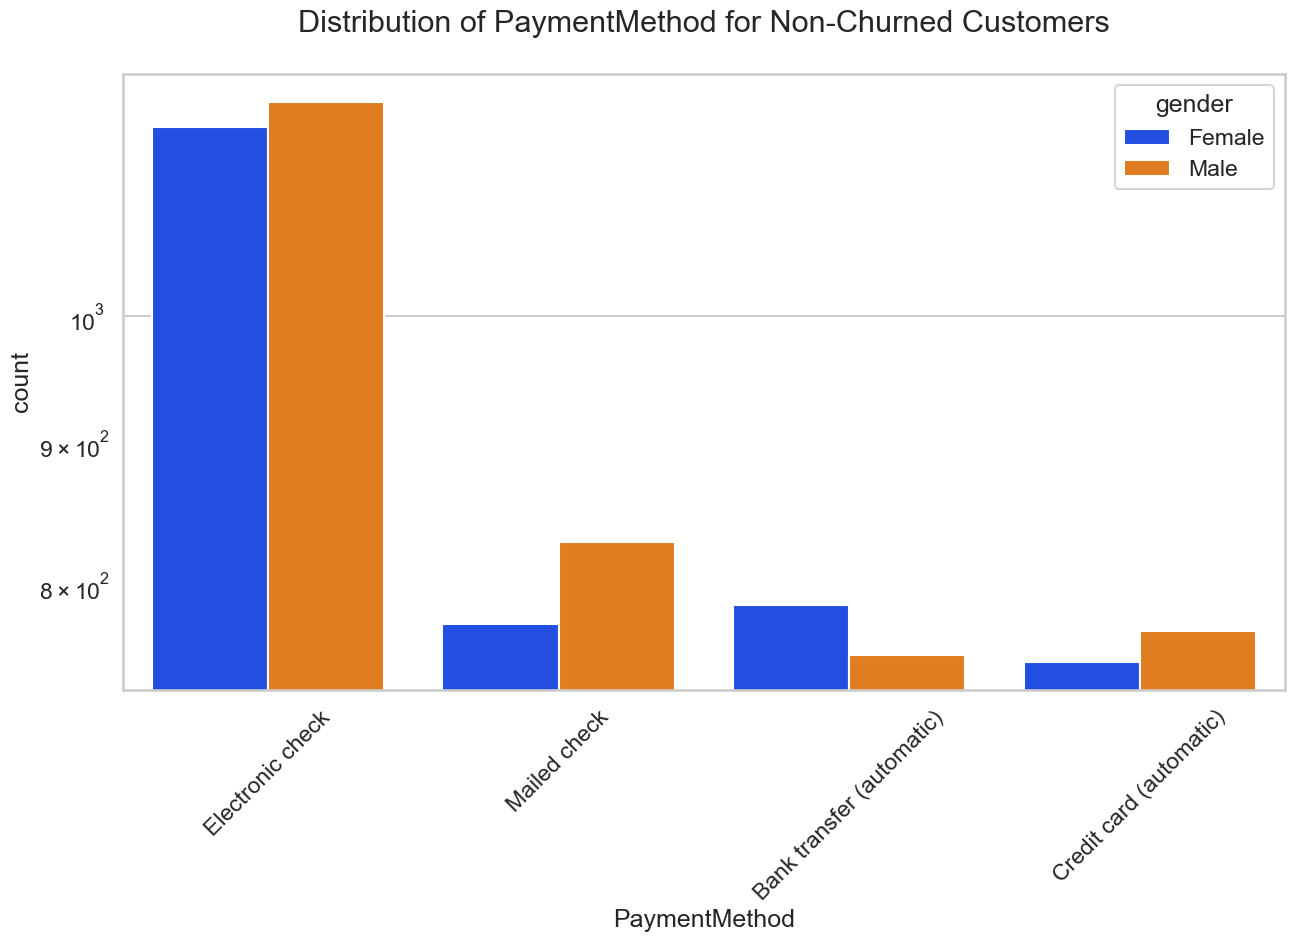

In [41]:
uniplot(df_target_1,col='PaymentMethod',title='Distribution of PaymentMethod for Non-Churned Customers',hue='gender') #Churners


## WITH RESPECT TO TECH_SUPPORT PROVIDED

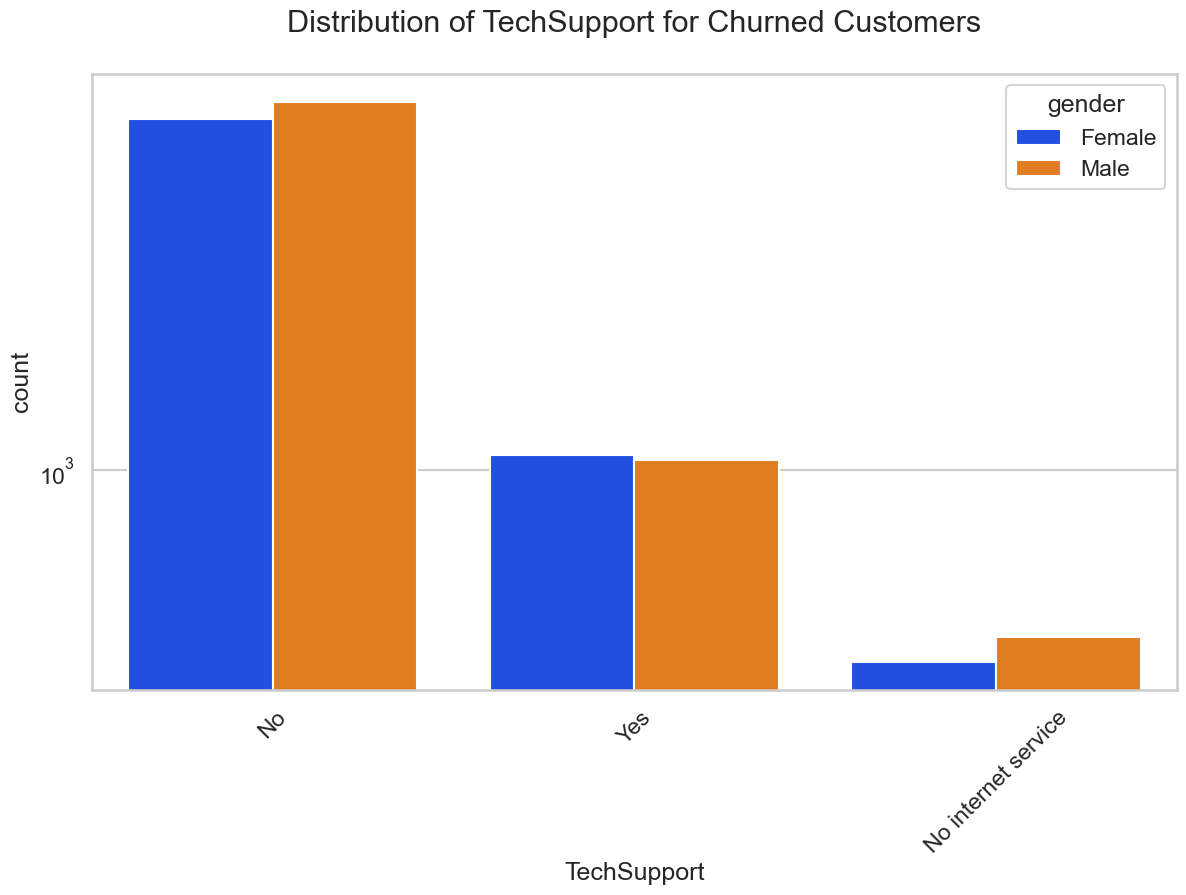

In [44]:
uniplot(df_target_1,col='TechSupport',title='Distribution of TechSupport for Churned Customers',hue='gender')


**Large data of users have churned due to not receiving the tech support**

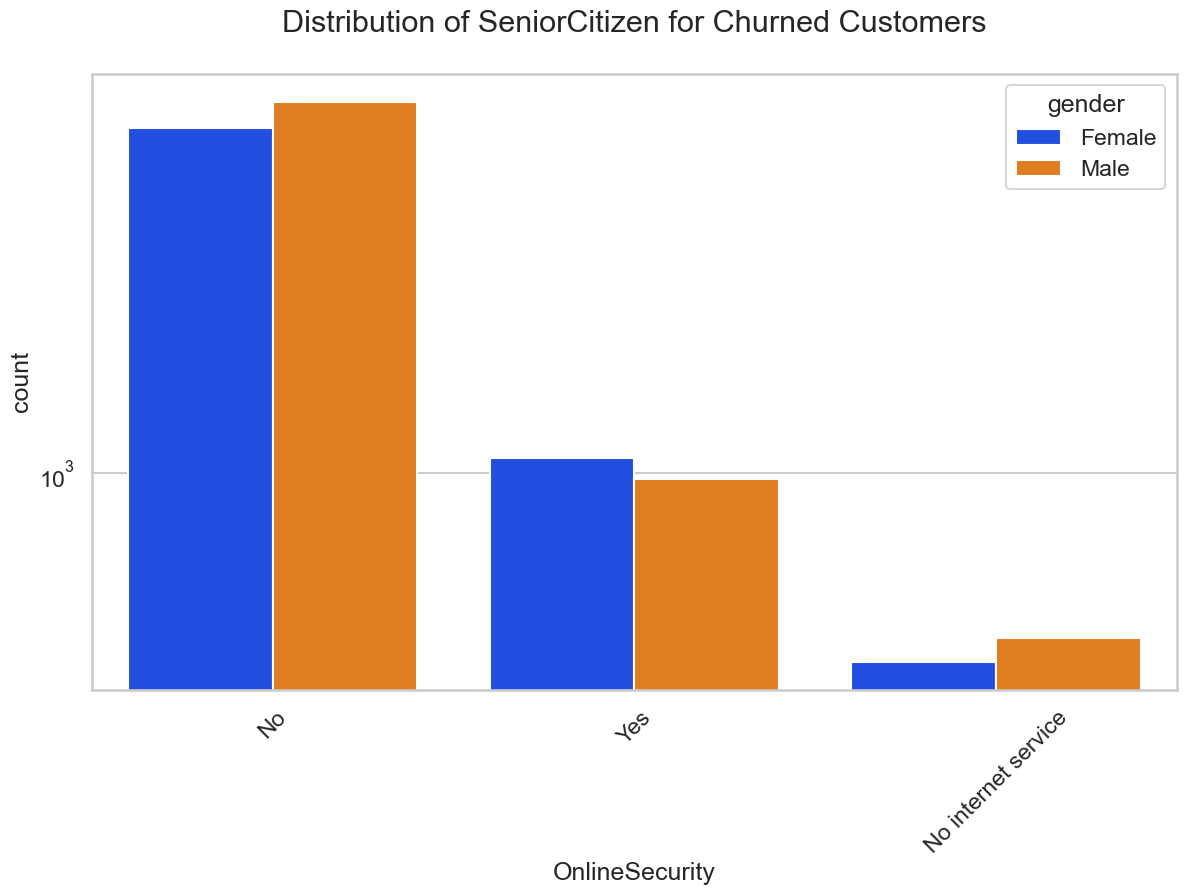

In [47]:
uniplot(df_target_1,col='OnlineSecurity',title='Distribution of SeniorCitizen for Churned Customers',hue='gender')


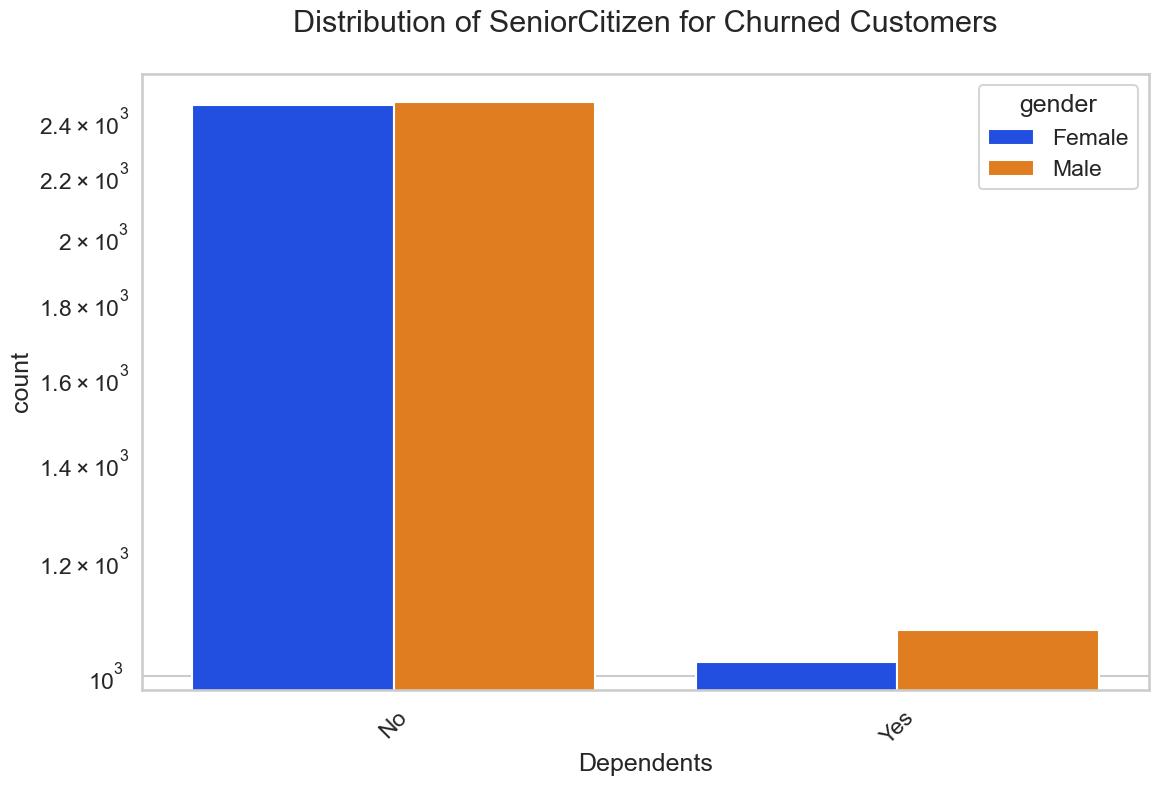

In [52]:
uniplot(df_target_1,col='Dependents',title='Distribution of SeniorCitizen for Churned Customers',hue='gender')


**Surprisingly users with dependents have churned at a less rate and with no dependents have churned at a higher number. Like wise we can use different columns to infer data related to churn and non churners with multiple parameters** 

## Model build

In [113]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder


In [114]:
x = Final_Data.drop('Churn',axis = 1)
x.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [115]:
y = Final_Data['Churn']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int32

## Train_Test split

In [118]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [163]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Create a LabelEncoder object
le = LabelEncoder()

# Apply LabelEncoder on each categorical column, as I got ValueError
for col in x.columns:
    if x[col].dtype == 'object':
        x[col] = le.fit_transform(x[col])

# Now, split the data into training and testing datasets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

# Now, 'x_train' and 'x_test' only contain numeric values
model_dt = DecisionTreeClassifier(criterion="gini", random_state=100, max_depth=6, min_samples_leaf=8)
model_dt.fit(x_train, y_train)




DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [164]:
y_pred=model_dt.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 1, 1])

In [125]:
model_dt.score(x_test,y_test)


0.7909952606635071

In [126]:
print(classification_report(y_test, y_pred, labels=[0,1]))


              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1563
           1       0.61      0.55      0.58       547

    accuracy                           0.79      2110
   macro avg       0.73      0.71      0.72      2110
weighted avg       0.79      0.79      0.79      2110



## Accuracy is not high as it is a imbalanced dataset, so here we need not see the accuracy as it is cursed in a imbalanced dataset

In [129]:
from imblearn.combine import SMOTEENN


In [132]:
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(x,y)


In [133]:
xr_train,xr_test,yr_train,yr_test=train_test_split(X_resampled, y_resampled,test_size=0.2)


In [134]:
model_dt_smote=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)


In [135]:
model_dt_smote.fit(xr_train,yr_train)
yr_predict = model_dt_smote.predict(xr_test)
model_score_r = model_dt_smote.score(xr_test, yr_test)
print(model_score_r)
print(metrics.classification_report(yr_test, yr_predict))

0.8704061895551257
              precision    recall  f1-score   support

           0       0.89      0.81      0.85       456
           1       0.86      0.92      0.89       578

    accuracy                           0.87      1034
   macro avg       0.87      0.86      0.87      1034
weighted avg       0.87      0.87      0.87      1034



In [136]:
print(metrics.confusion_matrix(yr_test, yr_predict))


[[368  88]
 [ 46 532]]


In [144]:
import pickle

In [145]:
filename = 'model.sav'


In [146]:
pickle.dump(model_dt_smote, open(filename, 'wb'))
load_model = pickle.load(open(filename, 'rb'))
model_score_dt = load_model.score(xr_test, yr_test)


In [147]:
model_score_dt

0.8704061895551257

## Secondly we can try another classifier here, Random Forest Classifier

In [148]:
from sklearn.ensemble import RandomForestClassifier
model_rf=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)
model_rf.fit(x_train,y_train)


RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [149]:
y_pred=model_rf.predict(x_test)
model_rf.score(x_test,y_test)


0.8037914691943128

In [150]:
print(classification_report(y_test, y_pred, labels=[0,1]))


              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1563
           1       0.67      0.47      0.55       547

    accuracy                           0.80      2110
   macro avg       0.75      0.70      0.71      2110
weighted avg       0.79      0.80      0.79      2110



## Repeat the same as the Decision Tree

In [153]:
sm = SMOTEENN()
X_resampled1, y_resampled1 = sm.fit_resample(x,y)

***for Random Forest we can use, xr, yr, xr_train1, yr_test1, model_rf_smote***

In [155]:
xr_train1,xr_test1,yr_train1,yr_test1=train_test_split(X_resampled1, y_resampled1,test_size=0.2)


In [156]:
model_rf_smote=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [157]:
model_rf_smote.fit(xr_train1,yr_train1)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [158]:
yr_predict1 = model_rf_smote.predict(xr_test1)

In [159]:
model_score_r1 = model_rf_smote.score(xr_test1, yr_test1)

In [160]:
print(model_score_r1)
print(metrics.classification_report(yr_test1, yr_predict1))

0.899009900990099
              precision    recall  f1-score   support

           0       0.91      0.84      0.87       413
           1       0.89      0.94      0.92       597

    accuracy                           0.90      1010
   macro avg       0.90      0.89      0.89      1010
weighted avg       0.90      0.90      0.90      1010



In [161]:
print(metrics.confusion_matrix(yr_test1, yr_predict1))

[[346  67]
 [ 35 562]]


In [162]:
filename = 'model.sav'

pickle.dump(model_rf_smote, open(filename, 'wb'))

load_model = pickle.load(open(filename, 'rb'))

model_score_r1 = load_model.score(xr_test1, yr_test1)

model_score_r1

0.899009900990099

## From the Decision Tree Classifier we got 80% score and from Random Forest we got 89%, so this is the best classifier for this model